In [49]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from nptdms import TdmsFile

import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.optimize import curve_fit

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 14})
rc('text', usetex=True)

In [13]:
path = "C:\\Users\\Thomas\\Quantum_Optics_Lab\\1.Photon_Counting\\Data\\"
path_ = "Fuente_Coherente\\"
path__1 = "Disco_Esmerilado\\1V\\"
path__2 = "Disco_Esmerilado\\2V\\"
path__4 = "Disco_Esmerilado\\4V\\"

names = ["1micro.tdms", "5micro.tdms", "10micro.tdms", "50micro.tdms", "100micro.tdms", "100mili.tdms"]
values = [1, 5, 10, 50, 100]

># Cálculo de la Fuente Coherente:

La estadística asociada a una fuente de luz coherente, particularmente a la emitida por un láser del laboratorio, puede definirse mediante una distribución de Poisson. La forma general de esta distribución es:

$$P(N, T)_{\text{Poisson}} = \frac{\langle N \rangle^{N}}{N!}\exp\left\{-\langle N \rangle\right\}$$

donde el valor $\langle N \rangle$ correspondrá al número promedio de conteos, y también puede relacionarse con el factor $\lambda$ que aparece al referirnos a una Poissoniana.

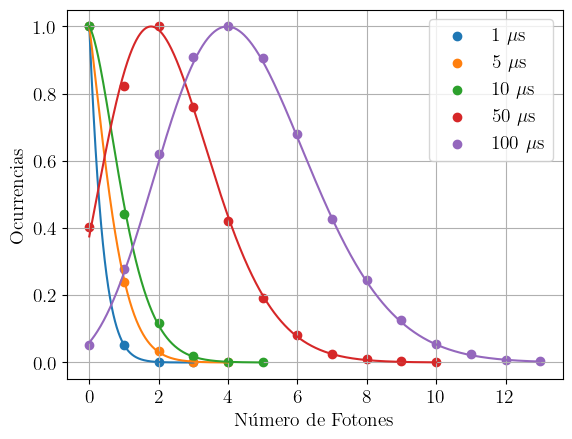

In [41]:
fig, ax = plt.subplots()
lambdas_ = []

for i in range(0, len(names) - 1):
    tdms_file = TdmsFile.read(path + path_ + names[i])
    dataframe = tdms_file.as_dataframe()
    
    numpy_x = dataframe["/'Histograma'/'X values'"].to_numpy() # Valores del eje x.
    numpy_x = numpy_x[~np.isnan(numpy_x)]
    numpy_x = np.round(numpy_x)
    
    numpy_h = dataframe["/'Histograma'/'h(x)'"].to_numpy() # Altura h(x) del histograma.
    numpy_h = numpy_h[~np.isnan(numpy_h)]
    
    N = np.sum(numpy_h)
    lambda_ = np.sum(numpy_x*numpy_h)/N # Cálculo del valor lambda.
    inc_lambda = np.sqrt(lambda_/N)
    lambdas_.append((lambda_, inc_lambda))
    x = np.linspace(min(numpy_x), max(numpy_x), 1000)
    y = lambda_**(x)/(np.vectorize(math.gamma)(x + 1)) * np.e**(-lambda_)
    
    ax.scatter(numpy_x, numpy_h/np.max(numpy_h), label = names[i].replace("micro.tdms", r" $\mu$s"))
    ax.plot(x, y/np.max(y))
    
ax.legend()
ax.set_xlabel("Número de Fotones")
ax.set_ylabel("Ocurrencias")
ax.grid(True)

In [40]:
lambdas_ # Los lambdas de la distribución son los mismos <N>.

[(0.0526, 0.003243454948045371),
 (0.2492, 0.007059745037889116),
 (0.4706, 0.009701546268507923),
 (2.2972, 0.021434551546510135),
 (4.4832, 0.029943947635540643)]

># Cálculo de la Fuente Pseudo-Térmica:

En este caso, la distribución que se espera siga la luz se asemeja mucho más a una distribución de Bose-Einstein, la cual tiene una forma general:

$$P(N, T)_{\text{Bose-Einstein}} = \frac{\langle N \rangle^{N}}{(1 + \langle N \rangle)^{N + 1}}$$

Si se toman mediciones de fotones en un tiempo cercano al tiempo de correlación del láser ($T \approx \tau_{c}$), el comportamiento de la distribución no es determinante, dado que ahora la estadística oscilará entre una distribución de Poisson y una de Bose-Einstein. Podemos determinar estas fluctuaciones mediante la expresión:

$$\langle\Delta{N}^{2}\rangle = \langle{N}\rangle + \langle{N}\rangle^{2} \cdot \left[\exp\left\{\frac{-2T}{\tau_{c}}\right\} - 1 +\frac{2T}{\tau_{c}}\right]$$

No obstante, es muy probable que el determinar estas fluctuaciones no sea posible a menos que se resuelva con métodos numéricos. Primero veamos lo que sucede si modelamos esta fuente como una fuente coherente, es decir, que siga una estadística de Poisson:

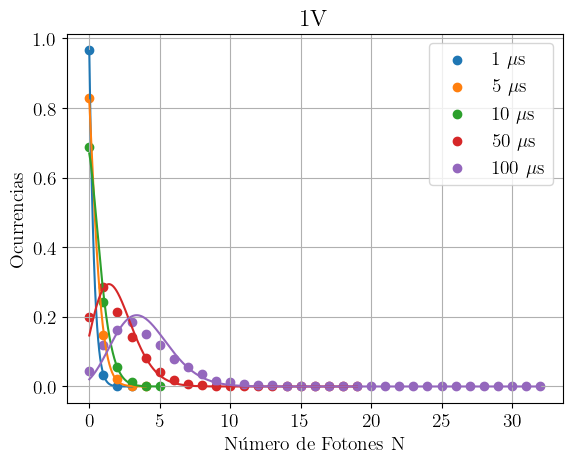

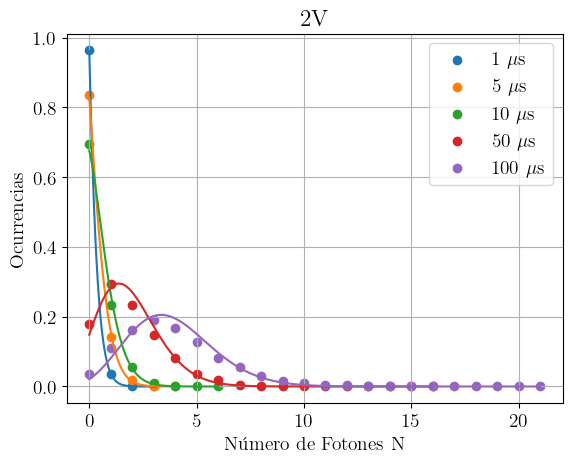

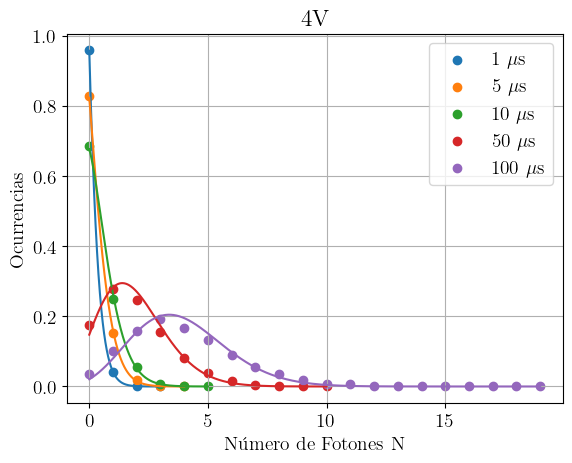

In [113]:
discos = [[], [], []]
discos_lambdas = [[], [], []]
paths = [path__1, path__2, path__4]
names_ = ["1V", "2V", "4V"]
archive = [[], [], []]

for i in range(0, len(discos)):
    fig, ax = plt.subplots()
    for j in range(0, len(names) - 1):
        tdms_file = TdmsFile.read(path + paths[i] + names[j])
        dataframe = tdms_file.as_dataframe()

        numpy_x = dataframe["/'Histograma'/'X values'"].to_numpy() # Valores del eje x.
        numpy_x = numpy_x[~np.isnan(numpy_x)]
        numpy_x = np.round(numpy_x)

        numpy_h = dataframe["/'Histograma'/'h(x)'"].to_numpy() # Altura h(x) del histograma.
        numpy_h = numpy_h[~np.isnan(numpy_h)]
        numpy_h = numpy_h/np.sum(numpy_h)

        N = np.sum(numpy_h)
        lambda_ = np.sum(numpy_x*numpy_h)/N # Cálculo del valor lambda.
        inc_lambda = np.sqrt(lambda_/N)
        discos[i].append((lambda_, inc_lambda))
        discos_lambdas[i].append(lambda_)
        x = np.linspace(min(numpy_x), max(numpy_x), 1000)
        y = lambda_**(x)/(np.vectorize(math.gamma)(x + 1)) * np.e**(-lambda_)

        ax.scatter(numpy_x, numpy_h, label = names[j].replace("micro.tdms", r" $\mu$s"))
        ax.set_title(names_[i])
        ax.plot(x, y)
        
        if 0 <= j <= 2:
            archive[i].append(y)
    
    ax.legend()
    ax.set_xlabel("Número de Fotones N")
    ax.set_ylabel("Ocurrencias")
    ax.grid(True)

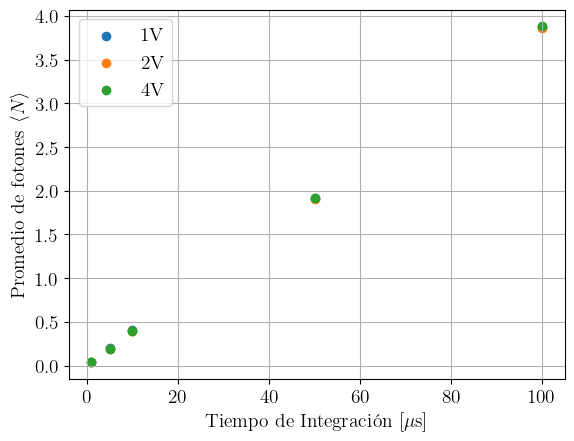

In [82]:
fig_, ax_ = plt.subplots()
for k in range(0, len(discos)):
    ax_.scatter(values, discos_lambdas[k], label = names_[k])
ax_.legend()
ax_.set_ylabel(r"Promedio de fotones $\langle{N}\rangle$")
ax_.set_xlabel(r"Tiempo de Integración [$\mu$s]")
ax_.grid(True)

Como se logra apreciar, la estadística de Poisson genera resultados idénticos a la tendencia presentada por los datos. Por otro lado, al intentar introducir una estadística de Bose-Einstein, sólo es posible obtener resultados útiles si se trabaja sobre las sub-Poissonianas (Más parecida a una exponencial decreciente). De esta manera se obtiene:

In [83]:
def bose_einstein(k, k_mean):
    return (k_mean**k) / ((1 + k_mean)**(k + 1))

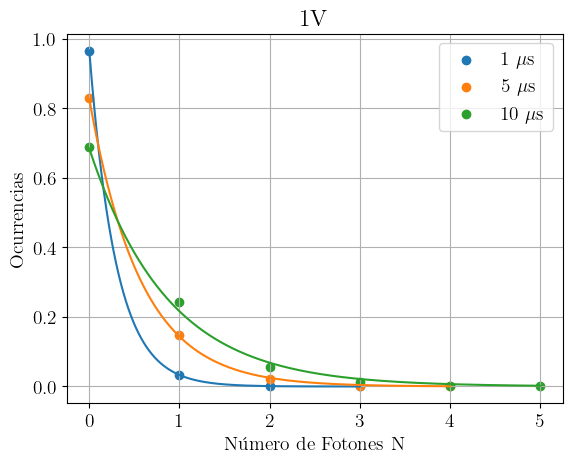

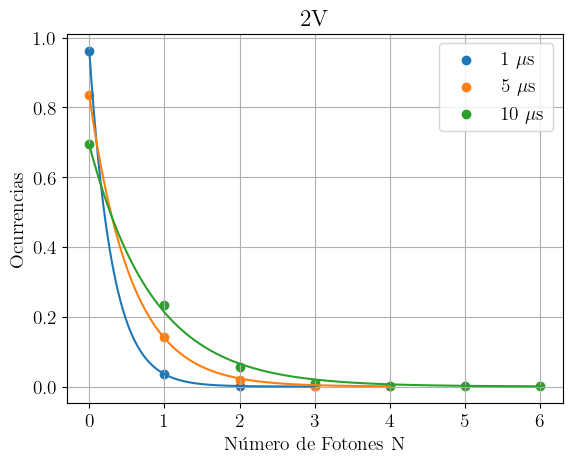

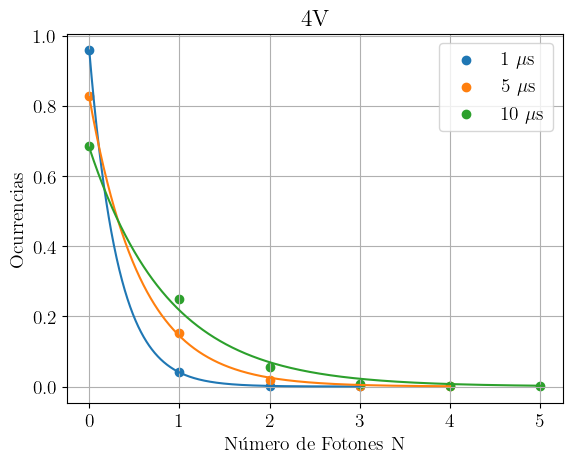

In [114]:
discos = [[], [], []]
discos_lambdas = [[], [], []]
paths = [path__1, path__2, path__4]
names_ = ["1V", "2V", "4V"]
archive_ = [[], [], []]
xs = []

for i in range(0, len(discos)):
    fig, ax = plt.subplots()
    for j in range(0, len(names) - 3):
        tdms_file = TdmsFile.read(path + paths[i] + names[j])
        dataframe = tdms_file.as_dataframe()

        numpy_x = dataframe["/'Histograma'/'X values'"].to_numpy() # Valores del eje x.
        numpy_x = numpy_x[~np.isnan(numpy_x)]
        numpy_x = np.round(numpy_x)

        numpy_h = dataframe["/'Histograma'/'h(x)'"].to_numpy() # Altura h(x) del histograma.
        numpy_h = numpy_h[~np.isnan(numpy_h)]
        numpy_h = numpy_h/np.sum(numpy_h)

        N = np.sum(numpy_h)
        lambda_ = np.sum(numpy_x*numpy_h)/N # Cálculo del valor lambda.
        inc_lambda = np.sqrt(lambda_/N)
        discos[i].append((lambda_, inc_lambda))
        discos_lambdas[i].append(lambda_)
        
        x = np.linspace(min(numpy_x), max(numpy_x), 1000)
        popt, pcov = curve_fit(bose_einstein, numpy_x, numpy_h, p0 = [1])
        
        k_mean_fit = popt[0]
        k_mean_err = np.sqrt(pcov[0, 0])
        
        
        y = bose_einstein(x, k_mean_fit)

        ax.scatter(numpy_x, numpy_h, label = names[j].replace("micro.tdms", r" $\mu$s"))
        ax.set_title(names_[i])
        ax.plot(x, y)
        
        if 0 <= j <= 2:
            archive_[i].append(y)
        
        if i == 0:
            xs.append(x)
    ax.legend()
    ax.set_xlabel("Número de Fotones N")
    ax.set_ylabel("Ocurrencias")
    ax.grid(True)

Como se logra apreciar, estos valores de integración temporal son menores al periodo de correlación del láser, por lo que sí se aprecia la estadística de Bose Einstein. No obstante, comparar con los resultados de la distribución de Poisson da resultados prácticamente idénticos.

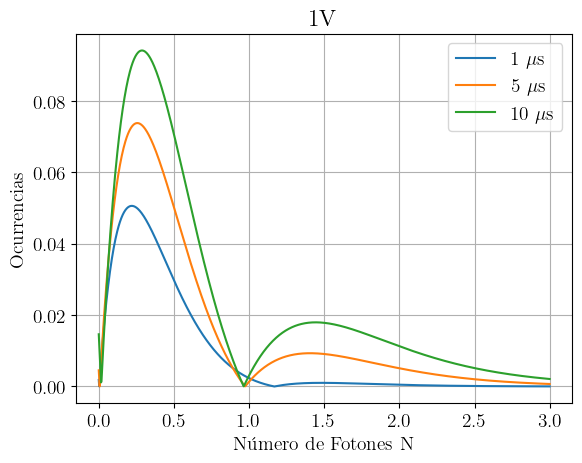

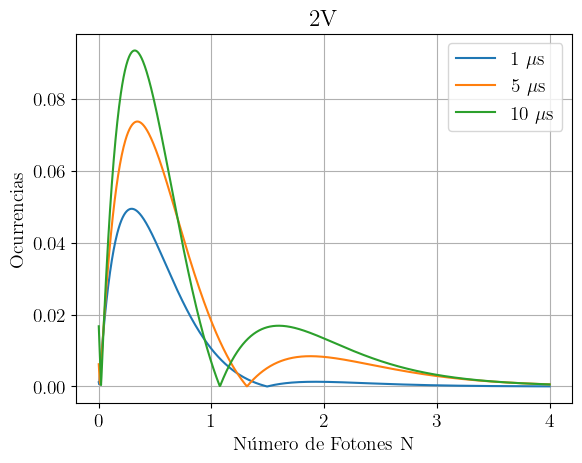

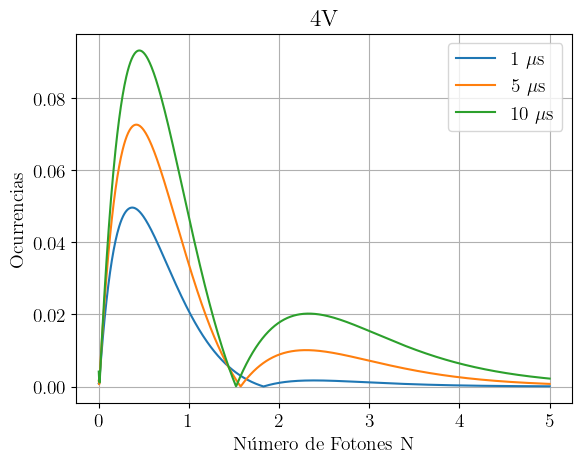

In [119]:
for i in range(0, len(archive)):
    fig, ax = plt.subplots()
    for j in range(0, len(archive[i])):
        ax.plot(xs[i], np.abs(archive[i][j] - archive_[i][j]), label = names[j].replace("micro.tdms", r" $\mu$s"))
        ax.set_title(names_[i])
    ax.legend()
    ax.set_xlabel("Número de Fotones N")
    ax.set_ylabel("Ocurrencias")
    ax.grid(True)

Al determinar que la mejor tendencia que se sigue es la de una Poissoniana, es posible determinar el tiempo de correlación si asumimos $\langle{\Delta{N}^{2}}\rangle = \langle{N}\rangle$, por lo que quedaría resolver la expresión:

$$\exp\left\{\frac{-2T}{\tau_{c}}\right\} - 1 +\frac{2T}{\tau_{c}} = 0$$

No obstante, para el rango de valores que trabajamos, esto nunca se hace cero, por lo que no es posible analizar la situación como tal.